In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()
X_train = X_train/255
X_test = X_test/255
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation="softmax") # Output layer
])

In [4]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

In [5]:
r = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2936 - accuracy: 0.9140 - val_loss: 0.1385 - val_accuracy: 0.9582
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1444 - accuracy: 0.9570 - val_loss: 0.1087 - val_accuracy: 0.9686
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1076 - accuracy: 0.9669 - val_loss: 0.0855 - val_accuracy: 0.9746
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0893 - accuracy: 0.9723 - val_loss: 0.0845 - val_accuracy: 0.9733
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0773 - accuracy: 0.9755 - val_loss: 0.0765 - val_accuracy: 0.9774
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0669 - accuracy: 0.9784 - val_loss: 0.0778 - val_accuracy: 0.9775
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0591 - accuracy: 0.9803 - val_loss: 0.0722 - val_accuracy:

In [6]:
r.history

{'loss': [0.2936066687107086,
  0.14444980025291443,
  0.10759811848402023,
  0.08931612223386765,
  0.07732396572828293,
  0.06689198315143585,
  0.05909968540072441,
  0.052556026726961136,
  0.048957306891679764,
  0.046664681285619736],
 'accuracy': [0.9140499830245972,
  0.9569833278656006,
  0.966866672039032,
  0.9723333120346069,
  0.9754666686058044,
  0.9784166812896729,
  0.9803166389465332,
  0.9824833273887634,
  0.9838333129882812,
  0.9843833446502686],
 'val_loss': [0.13853782415390015,
  0.10869299620389938,
  0.08552272617816925,
  0.08445144444704056,
  0.07645276933908463,
  0.07784127444028854,
  0.07215097546577454,
  0.06778951734304428,
  0.06578227132558823,
  0.06799530982971191],
 'val_accuracy': [0.9581999778747559,
  0.9685999751091003,
  0.9746000170707703,
  0.9732999801635742,
  0.977400004863739,
  0.9775000214576721,
  0.9779999852180481,
  0.9797000288963318,
  0.9800999760627747,
  0.9800000190734863]}

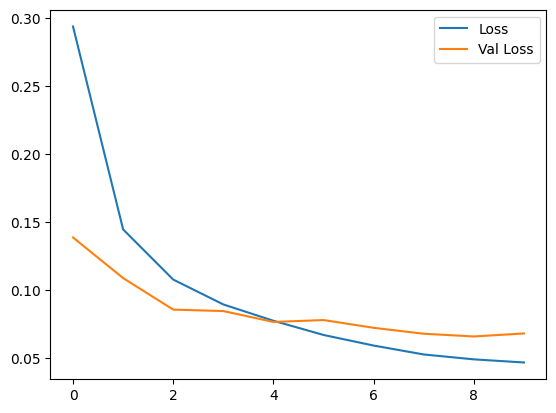

In [12]:
plt.plot(r.history["loss"],label="Loss")
plt.plot(r.history["val_loss"],label="Val Loss")
plt.legend()
plt.show()

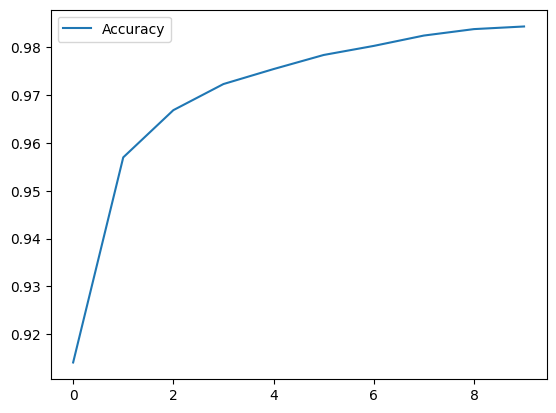

In [13]:
plt.plot(r.history["accuracy"],label="Accuracy")
plt.legend()
plt.show()

In [16]:
evaluate=model.evaluate(X_test,y_test)
print("Loss:"+ str(evaluate[0]))
print("Accuracy:"+ str(evaluate[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0680 - accuracy: 0.9800
Loss:0.06799530982971191
Accuracy:0.9800000190734863


In [28]:
y_pred = model.predict(X_test)
y_pred_arg = np.argmax(y_pred,axis=-1)
y_pred_arg

313/313 [==============================] - 0s 1ms/step


array([7, 2, 1, ..., 4, 5, 6])

In [30]:
df = pd.DataFrame({"y_pred":y_pred_arg,"y_test":y_test})
df

,y_pred,y_test
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
...,...,...
9995,2,2
9996,3,3
9997,4,4
9998,5,5


In [41]:
filter = (df["y_pred"] != df["y_test"])
df.loc[filter]

,y_pred,y_test
18,8,3
149,9,2
247,6,4
290,4,8
321,7,2
...,...,...
9839,7,2
9858,8,6
9879,6,0
9975,8,3


In [53]:
# Confusion Matrix

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, 
                          normalize=False,
                          title="Confusion matrix",
                          cmap=plt.cm.Blues):
  
  if normalize:
    cm = cm.astype("float") / cm.sum(axis=1)[:,np.newaxis]
    print("Normalized Confusion matrix")
  else:
    print("Confusion matrix without normalization")
  print(cm)

  plt.imshow(cm, interpolation="nearest",cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt  = ".2f" if normalize else "d"
  thresh = cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j],fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")
  plt.tight_layout()
  plt.ylabel("True Label")
  plt.xlabel("Predicted Label")
  plt.show()



313/313 [==============================] - 0s 1ms/step
Confusion matrix without normalization
[[ 967    0    1    2    0    2    4    1    2    1]
 [   0 1125    3    1    0    0    1    0    5    0]
 [   2    1 1011    1    1    0    2    5    8    1]
 [   0    0    2  994    0    3    0    3    6    2]
 [   0    1    2    1  961    1    7    0    2    7]
 [   3    0    0    5    2  875    2    0    3    2]
 [   5    3    0    1    2    5  941    0    1    0]
 [   1    5   10    4    3    0    0  998    2    5]
 [   4    0    1    9    6    2    0    5  944    3]
 [   2    2    0    4    7    5    0    3    2  984]]


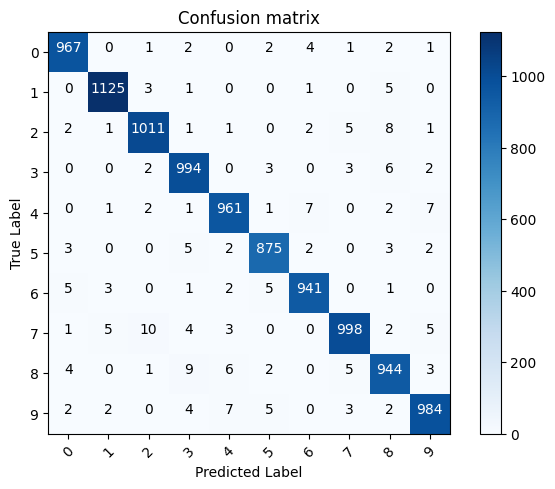

In [54]:
p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm, list(range(10)))

In [55]:
print(cm)
print(cm.max())

[[ 967    0    1    2    0    2    4    1    2    1]
 [   0 1125    3    1    0    0    1    0    5    0]
 [   2    1 1011    1    1    0    2    5    8    1]
 [   0    0    2  994    0    3    0    3    6    2]
 [   0    1    2    1  961    1    7    0    2    7]
 [   3    0    0    5    2  875    2    0    3    2]
 [   5    3    0    1    2    5  941    0    1    0]
 [   1    5   10    4    3    0    0  998    2    5]
 [   4    0    1    9    6    2    0    5  944    3]
 [   2    2    0    4    7    5    0    3    2  984]]
1125


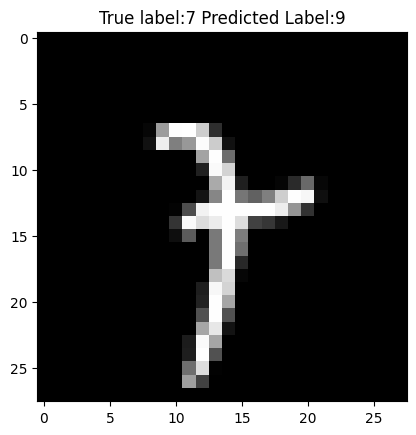

In [64]:
misclassifed_idx = np.where(y_test != p_test)[0]
i = np.random.choice(misclassifed_idx)
plt.imshow(X_test[i],cmap="gray")
plt.title("True label:"+str(y_test[i])+" Predicted Label:"+str(p_test[i]))
plt.show()